In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the training dataset
df_train = pd.read_csv('train_Vehicle Loan Default.csv')
df_train

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [3]:
#checking for null values in the dataset
df_train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [4]:
#dropping the rows with null values because they form a small percentage of the training set
df_train = df_train.dropna()
df_train

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [5]:
df_train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [6]:
#dropping some redundant columns
df_train.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag','VoterID_flag', 'Driving_flag', 'Passport_flag'], axis = 1, inplace = True)
df_train

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,Salaried,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,47145,65550,73.23,Self employed,598,I-Medium Risk,1,1,1,27600,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,53278,61360,89.63,Self employed,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,57513,66113,88.48,Self employed,305,L-Very High Risk,3,0,0,0,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,Self employed,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,54513,61900,89.66,Self employed,825,A-Very Low Risk,2,0,0,0,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,46349,61500,76.42,Salaried,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,43894,61900,71.89,Salaried,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,53713,61973,89.56,Self employed,718,D-Very Low Risk,1,1,0,-41,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,52603,61300,86.95,Salaried,818,A-Very Low Risk,1,0,0,0,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [7]:
df_train['loan_default'].value_counts()

0    176526
1     48967
Name: loan_default, dtype: int64

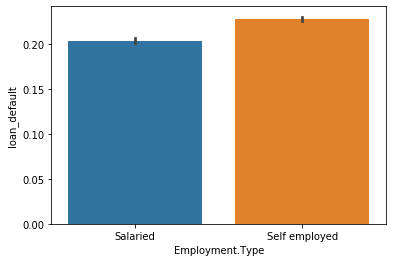

In [8]:
sns.barplot(x = df_train['Employment.Type'], y = df_train['loan_default'], data = df_train)


In [9]:
df_train[(df_train['loan_default'] == 1) & (df_train['Employment.Type'] == 'Salaried')]

,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
12,53278,61330,89.68,Salaried,300,M-Very High Risk,7,2,1,0,...,0,0,3300,0,0,0,1yrs 3mon,2yrs 9mon,0,1
13,49478,57010,89.46,Salaried,738,C-Very Low Risk,10,5,0,79750,...,0,0,23309,0,1,0,1yrs 0mon,2yrs 1mon,4,1
15,47549,61400,79.80,Salaried,17,Not Scored: Not Enough Info available on the c...,1,0,0,0,...,0,0,7900,0,1,0,0yrs 1mon,0yrs 1mon,0,1
39,50578,58400,89.55,Salaried,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
53,55513,67950,83.15,Salaried,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
55,53040,67067,82.73,Salaried,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
58,48693,65500,77.86,Salaried,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
61,54273,66855,86.75,Salaried,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
62,43869,62577,71.91,Salaried,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
63,50673,62577,84.70,Salaried,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1


In [10]:
df_train[(df_train['loan_default'] == 1) & (df_train['Employment.Type'] == 'Self employed')]

,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
1,47145,65550,73.23,Self employed,598,I-Medium Risk,1,1,1,27600,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
3,57513,66113,88.48,Self employed,305,L-Very High Risk,3,0,0,0,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,Self employed,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
10,53278,61230,89.83,Self employed,300,M-Very High Risk,1,0,0,0,...,0,0,2270,0,0,0,0yrs 7mon,0yrs 7mon,0,1
14,49278,57080,89.35,Self employed,300,M-Very High Risk,5,5,3,95597,...,0,0,3514,0,0,0,3yrs 11mon,7yrs 2mon,0,1
18,70017,86760,82.99,Self employed,585,I-Medium Risk,1,0,1,0,...,0,0,0,0,0,0,1yrs 9mon,1yrs 9mon,0,1
19,58259,68500,86.13,Self employed,615,H-Medium Risk,1,0,0,0,...,0,0,0,0,0,0,0yrs 11mon,0yrs 11mon,1,1
26,53713,61780,89.83,Self employed,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
27,57713,68040,86.27,Self employed,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
28,57513,65750,88.97,Self employed,615,H-Medium Risk,1,0,0,0,...,0,0,0,0,0,0,3yrs 1mon,3yrs 1mon,1,1


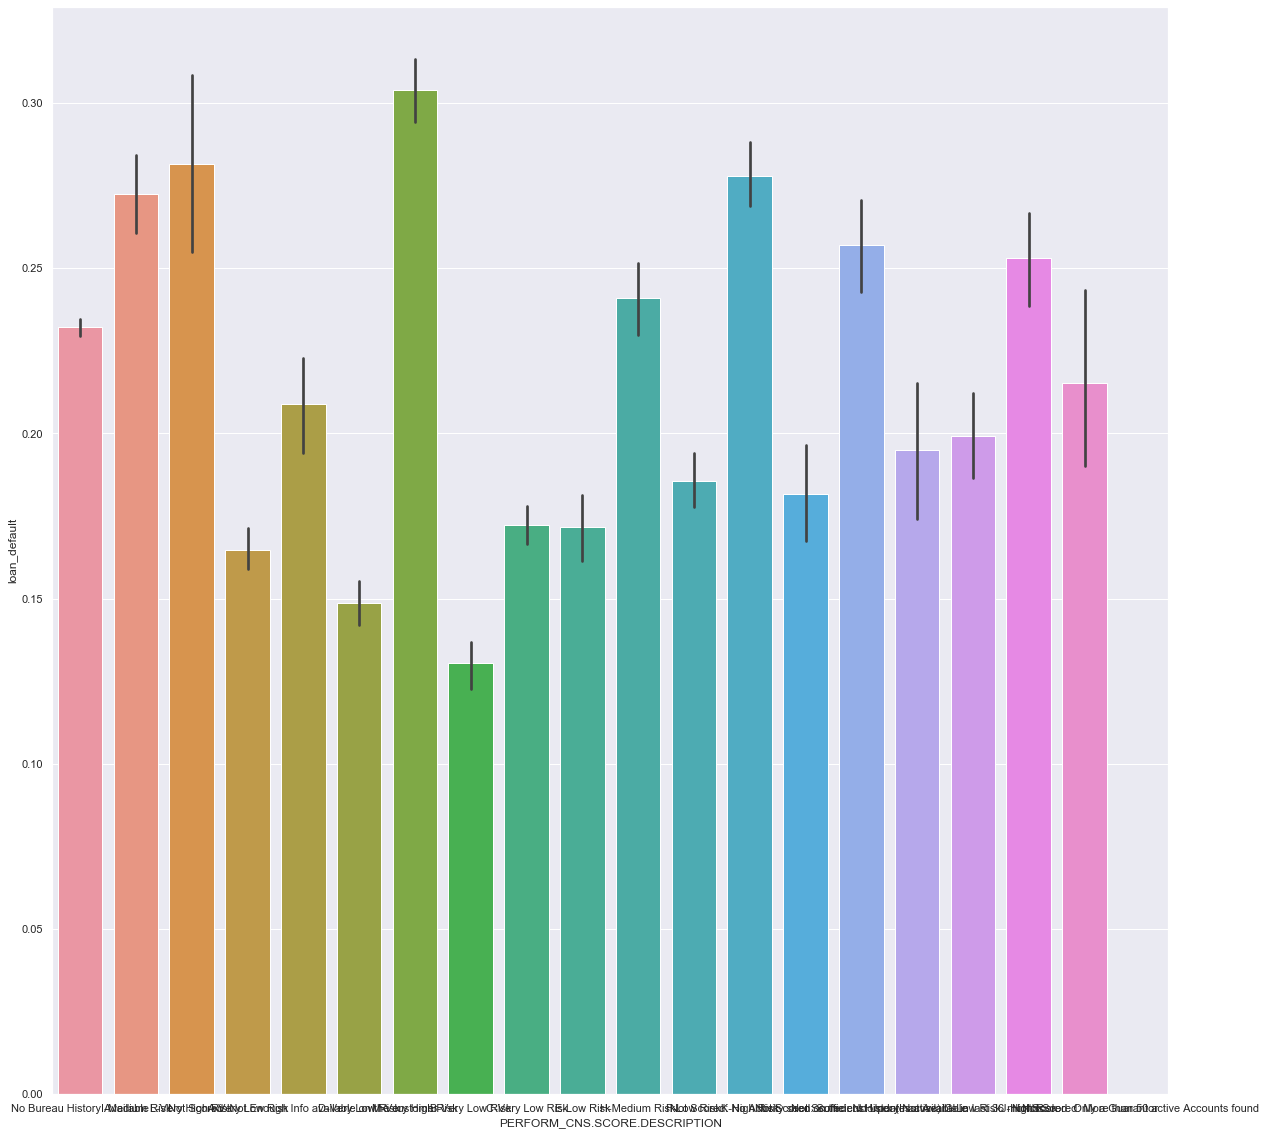

In [11]:
sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x = df_train['PERFORM_CNS.SCORE.DESCRIPTION'], y = df_train['loan_default'], data = df_train)


In [12]:
df_train[['PERFORM_CNS.SCORE','PERFORM_CNS.SCORE.DESCRIPTION','loan_default']]

,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,loan_default
0,0,No Bureau History Available,0
1,598,I-Medium Risk,1
2,0,No Bureau History Available,0
3,305,L-Very High Risk,1
4,0,No Bureau History Available,1
5,825,A-Very Low Risk,0
6,0,No Bureau History Available,0
7,17,Not Scored: Not Enough Info available on the c...,0
8,718,D-Very Low Risk,0
9,818,A-Very Low Risk,0


In [13]:
#dropping another set of redundant columns
df_train.drop(['PERFORM_CNS.SCORE.DESCRIPTION','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'], axis = 1, inplace = True)
df_train

,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,Self employed,598,1,1,1,27600,50200,...,0,0,0,0,1991,0,0,1,0,1
2,53278,61360,89.63,Self employed,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,Self employed,305,3,0,0,0,0,...,0,0,0,0,31,0,0,0,1,1
4,52378,60300,88.39,Self employed,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5,54513,61900,89.66,Self employed,825,2,0,0,0,0,...,0,0,0,0,1347,0,0,0,0,0
6,46349,61500,76.42,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,43894,61900,71.89,Salaried,17,1,1,0,72879,74500,...,0,0,0,0,0,0,0,0,0,0
8,53713,61973,89.56,Self employed,718,1,1,0,-41,365384,...,0,0,0,0,0,0,0,0,1,0
9,52603,61300,86.95,Salaried,818,1,0,0,0,0,...,0,0,0,0,2608,0,0,0,0,0


In [14]:
#Encoding categorical values
dummy_employment = pd.get_dummies(df_train['Employment.Type'])
df_train = pd.concat([df_train, dummy_employment], axis = 1)
df_train

,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Salaried,Self employed
0,50578,58400,89.55,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,47145,65550,73.23,Self employed,598,1,1,1,27600,50200,...,0,0,1991,0,0,1,0,1,0,1
2,53278,61360,89.63,Self employed,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57513,66113,88.48,Self employed,305,3,0,0,0,0,...,0,0,31,0,0,0,1,1,0,1
4,52378,60300,88.39,Self employed,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
5,54513,61900,89.66,Self employed,825,2,0,0,0,0,...,0,0,1347,0,0,0,0,0,0,1
6,46349,61500,76.42,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,43894,61900,71.89,Salaried,17,1,1,0,72879,74500,...,0,0,0,0,0,0,0,0,1,0
8,53713,61973,89.56,Self employed,718,1,1,0,-41,365384,...,0,0,0,0,0,0,1,0,0,1
9,52603,61300,86.95,Salaried,818,1,0,0,0,0,...,0,0,2608,0,0,0,0,0,1,0


In [16]:
#dropping employment type ans self employed columns
df_train.drop(['Employment.Type','Self employed'], axis = 1, inplace = True)
df_train

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Salaried
0,50578,58400,89.55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,...,0,0,0,1991,0,0,1,0,1,0
2,53278,61360,89.63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,305,3,0,0,0,0,0,...,0,0,0,31,0,0,0,1,1,0
4,52378,60300,88.39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,54513,61900,89.66,825,2,0,0,0,0,0,...,0,0,0,1347,0,0,0,0,0,0
6,46349,61500,76.42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,43894,61900,71.89,17,1,1,0,72879,74500,74500,...,0,0,0,0,0,0,0,0,0,1
8,53713,61973,89.56,718,1,1,0,-41,365384,365384,...,0,0,0,0,0,0,0,1,0,0
9,52603,61300,86.95,818,1,0,0,0,0,0,...,0,0,0,2608,0,0,0,0,0,1


In [17]:
df_train.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'loan_default', 'Salaried'],
      dtype='object')

In [18]:
df_train['SEC.NO.OF.ACCTS'].value_counts()

0     219731
1       3396
2       1022
3        438
4        289
5        147
6        115
7         75
8         67
9         37
10        35
11        29
13        16
12        12
16        11
14        11
15        10
18         6
19         5
17         5
20         4
22         4
23         4
31         4
21         3
46         2
24         2
38         2
30         2
34         2
37         1
42         1
28         1
35         1
29         1
25         1
52         1
Name: SEC.NO.OF.ACCTS, dtype: int64

In [19]:
df_train['SEC.ACTIVE.ACCTS'].value_counts()

0     221737
1       2637
2        627
3        193
4        116
5         64
6         32
7         22
8         17
9         10
10         9
11         7
12         5
15         4
13         3
16         2
22         2
26         1
14         1
17         1
20         1
21         1
36         1
Name: SEC.ACTIVE.ACCTS, dtype: int64

In [20]:
df_train['SEC.OVERDUE.ACCTS'].value_counts()

0    224183
1      1104
2       124
3        47
4        19
5         8
6         6
8         1
7         1
Name: SEC.OVERDUE.ACCTS, dtype: int64

In [21]:
df_train['SEC.CURRENT.BALANCE'].value_counts()

 0          222182
 800            10
 400             8
 100             8
 1200            6
 589             5
-1               5
 1               4
 1070            4
 1600            4
 1755            3
 72000           3
 26127           3
 30000           3
 4000            3
 20000           3
 5000            3
 12950           3
 6994            2
 46000           2
 5625            2
 49000           2
 5700            2
 12000           2
 228             2
 18000           2
 2990            2
 14393           2
 1398            2
 52278           2
             ...  
 47555           1
 24920           1
 8400            1
 364646          1
 1007672         1
 325962          1
 22878           1
 225723          1
 50509           1
 95995           1
 9937            1
 224952          1
 358011          1
 421400          1
 2989542         1
 1580502         1
 40390           1
 11600           1
 1109            1
 1722908         1
 15442           1
 314444     

In [22]:
df_train['SEC.SANCTIONED.AMOUNT'].value_counts()

0           221816
50000           82
100000          60
30000           43
200000          38
40000           37
15000           36
25000           34
10000           32
300000          30
20000           30
60000           27
500000          27
150000          23
75000           23
35000           22
45000           22
400000          21
43000           21
250000          19
600000          18
48000           18
49000           16
39000           15
46000           15
1000000         15
1200000         14
70000           13
1500000         13
53000           13
             ...  
3582874          1
5971             1
771127           1
933000           1
1785000          1
110074           1
224930           1
16200            1
352100           1
632699           1
1540000          1
221500           1
39235            1
279000           1
76789            1
1695083          1
10473001         1
138899           1
739000           1
22490            1
47174            1
49609       

In [23]:
df_train['SEC.DISBURSED.AMOUNT'].value_counts()

0           221846
50000           58
100000          46
200000          36
40000           29
300000          29
30000           26
500000          25
150000          23
400000          21
60000           19
20000           19
600000          18
43000           18
45000           17
250000          17
49000           16
48000           16
75000           16
25000           16
1000000         15
35000           15
15000           14
39000           14
46000           13
1200000         13
1500000         13
800000          11
38000           11
53000           11
             ...  
94460            1
82               1
4176             1
12244            1
72689            1
5971             1
4048617          1
224700           1
13527            1
462000           1
1682532          1
336630           1
11900000         1
296131           1
89977            1
17499            1
295875           1
1880901          1
4689             1
584270           1
339              1
87800       

In [24]:
df_train['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     174944
1      31361
2      10806
3       4375
4       1918
5        947
6        473
7        293
8        143
9         78
10        54
11        30
12        20
13        15
14        11
16         6
17         5
15         2
18         2
19         2
20         2
23         2
28         1
21         1
22         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [25]:
df_train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     207647
1      14680
2       2405
3        519
4        136
5         56
6         20
7         12
8          7
12         3
11         3
10         2
9          2
20         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [27]:
df_train.iloc[:, 0:21]

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
0,50578,58400,89.55,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,598,1,1,1,27600,50200,50200,...,0,0,0,0,0,1991,0,0,1,0
2,53278,61360,89.63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,305,3,0,0,0,0,0,...,0,0,0,0,0,31,0,0,0,1
4,52378,60300,88.39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,54513,61900,89.66,825,2,0,0,0,0,0,...,0,0,0,0,0,1347,0,0,0,0
6,46349,61500,76.42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,43894,61900,71.89,17,1,1,0,72879,74500,74500,...,0,0,0,0,0,0,0,0,0,0
8,53713,61973,89.56,718,1,1,0,-41,365384,365384,...,0,0,0,0,0,0,0,0,0,1
9,52603,61300,86.95,818,1,0,0,0,0,0,...,0,0,0,0,0,2608,0,0,0,0


In [28]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(df_train.iloc[:, 0:21])
df_train.iloc[:, 0:21] = scale.transform(df_train.iloc[:, 0:21])
df_train.iloc[:, 0:21]

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
0,-0.286698,-0.930028,1.288546,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113
1,-0.555414,-0.544116,-0.137795,0.899920,-0.279985,-0.027544,1.519677,-0.148036,-0.071266,-0.070986,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.073486,-0.02067,-0.402851,2.332684,-0.294113
2,-0.075357,-0.770266,1.295538,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113
3,0.256135,-0.513729,1.195029,0.035292,0.102937,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.086578,-0.02067,-0.402851,-0.255472,1.114172
4,-0.145804,-0.827478,1.187164,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,1.114172
5,0.021312,-0.741120,1.298160,1.569786,-0.088524,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.077788,-0.02067,-0.402851,-0.255472,-0.294113
6,-0.617721,-0.762710,0.141006,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113
7,-0.809884,-0.741120,-0.254909,-0.814581,-0.279985,-0.027544,-0.287288,-0.100458,-0.061190,-0.060923,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113
8,-0.041308,-0.737180,1.289420,1.254034,-0.279985,-0.027544,-0.287288,-0.177081,0.059423,0.059541,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,1.114172
9,-0.128192,-0.773505,1.061310,1.549129,-0.279985,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.08846,-0.065553,-0.032208,-0.040255,-0.039743,-0.069365,-0.02067,-0.402851,-0.255472,-0.294113


In [29]:
df_train

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,Salaried
0,-0.286698,-0.930028,1.288546,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113,0,1
1,-0.555414,-0.544116,-0.137795,0.899920,-0.279985,-0.027544,1.519677,-0.148036,-0.071266,-0.070986,...,-0.032208,-0.040255,-0.039743,-0.073486,-0.02067,-0.402851,2.332684,-0.294113,1,0
2,-0.075357,-0.770266,1.295538,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113,0,0
3,0.256135,-0.513729,1.195029,0.035292,0.102937,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.032208,-0.040255,-0.039743,-0.086578,-0.02067,-0.402851,-0.255472,1.114172,1,0
4,-0.145804,-0.827478,1.187164,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,1.114172,1,0
5,0.021312,-0.741120,1.298160,1.569786,-0.088524,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.032208,-0.040255,-0.039743,-0.077788,-0.02067,-0.402851,-0.255472,-0.294113,0,0
6,-0.617721,-0.762710,0.141006,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113,0,1
7,-0.809884,-0.741120,-0.254909,-0.814581,-0.279985,-0.027544,-0.287288,-0.100458,-0.061190,-0.060923,...,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113,0,1
8,-0.041308,-0.737180,1.289420,1.254034,-0.279985,-0.027544,-0.287288,-0.177081,0.059423,0.059541,...,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,1.114172,0,0
9,-0.128192,-0.773505,1.061310,1.549129,-0.279985,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.032208,-0.040255,-0.039743,-0.069365,-0.02067,-0.402851,-0.255472,-0.294113,0,1


In [30]:
X_train = df_train.drop(['loan_default'], axis = 1)
X_train

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Salaried
0,-0.286698,-0.930028,1.288546,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113,1
1,-0.555414,-0.544116,-0.137795,0.899920,-0.279985,-0.027544,1.519677,-0.148036,-0.071266,-0.070986,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.073486,-0.02067,-0.402851,2.332684,-0.294113,0
2,-0.075357,-0.770266,1.295538,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113,0
3,0.256135,-0.513729,1.195029,0.035292,0.102937,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086578,-0.02067,-0.402851,-0.255472,1.114172,0
4,-0.145804,-0.827478,1.187164,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,1.114172,0
5,0.021312,-0.741120,1.298160,1.569786,-0.088524,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.077788,-0.02067,-0.402851,-0.255472,-0.294113,0
6,-0.617721,-0.762710,0.141006,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113,1
7,-0.809884,-0.741120,-0.254909,-0.814581,-0.279985,-0.027544,-0.287288,-0.100458,-0.061190,-0.060923,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,-0.294113,1
8,-0.041308,-0.737180,1.289420,1.254034,-0.279985,-0.027544,-0.287288,-0.177081,0.059423,0.059541,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.02067,-0.402851,-0.255472,1.114172,0
9,-0.128192,-0.773505,1.061310,1.549129,-0.279985,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.069365,-0.02067,-0.402851,-0.255472,-0.294113,1


In [31]:
Y_train = df_train['loan_default']
Y_train

0         0
1         1
2         0
3         1
4         1
5         0
6         0
7         0
8         0
9         0
10        1
11        0
12        1
13        1
14        1
15        1
16        0
17        0
18        1
19        1
20        0
21        0
22        0
23        0
24        0
25        0
26        1
27        1
28        1
29        0
         ..
233124    0
233125    0
233126    0
233127    0
233128    1
233129    0
233130    0
233131    0
233132    0
233133    0
233134    0
233135    0
233136    0
233137    0
233138    0
233139    0
233140    0
233141    0
233142    0
233143    0
233144    0
233145    0
233146    0
233147    0
233148    0
233149    0
233150    0
233151    0
233152    0
233153    0
Name: loan_default, Length: 225493, dtype: int64

In [37]:
from sklearn import svm
svm_model = svm.SVC(kernel = 'linear', C = 0.01)
svm_model.fit(X_train,Y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
Y_train_pred = svm_model.predict(X_train)
Y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
accuracy_score(Y_train_pred,df_train['loan_default'])

0.7828447002789444

In [41]:
confusion_matrix(Y_train_pred,Y_train)

array([[176526,  48967],
       [     0,      0]], dtype=int64)

In [36]:
Y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log_model = LogisticRegression()

In [60]:
log_model.fit(X_train,Y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
Y_train_log_pred = log_model.predict(X_train)
Y_train_log_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
accuracy_score(Y_train_log_pred,Y_train)

0.7824455748072002

In [63]:
confusion_matrix(Y_train_log_pred,Y_train)

array([[176259,  48790],
       [   267,    177]], dtype=int64)

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


In [65]:
nb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [66]:
Y_train_nb_pred = nb.predict(X_train)

In [67]:
Y_train_nb_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
confusion_matrix(Y_train_nb_pred,Y_train)

array([[167113,  44920],
       [  9413,   4047]], dtype=int64)

In [69]:
accuracy_score(Y_train_nb_pred,Y_train)

0.7590479527080664

In [32]:
#Training the model with KNN
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

In [33]:
#running a loop to find out the best value of k
#dataset_len = len(X_train)
#limit = (int)(np.sqrt(dataset_len)/2)
#for k in range(5, 20):
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train,Y_train)
Y_train_knn_pred = knn_model.predict(X_train)
accuracy = metrics.accuracy_score(Y_train_knn_pred,Y_train)
#print(f"K value and accuracy are 5 and {accuracy} respectively")

In [34]:
accuracy

0.8085262070219474

In [35]:
Y_train_knn_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train_knn_pred,Y_train)

array([[168969,  35619],
       [  7557,  13348]], dtype=int64)

In [37]:
#importing test dataset
df_test = pd.read_csv('test_Vehicle Loan Default.csv')
df_test

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
5,725530,57657,71211,84.64,78,17014,45,2103,01-01-68,Self employed,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1
6,708592,48518,62767,82.85,78,17014,45,2071,06-09-82,Salaried,...,0,0,0,2122,0,0,0,1yrs 7mon,2yrs 5mon,0
7,714975,48743,63896,81.38,78,17014,45,2079,24-11-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
8,712795,50295,63896,82.35,78,17014,45,2071,01-01-88,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
9,708656,51653,67445,81.55,78,17014,45,2078,01-01-99,NaN,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [38]:
#counting null values in test dataset
df_test.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [39]:
df_test = df_test.dropna()
df_test

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
5,725530,57657,71211,84.64,78,17014,45,2103,01-01-68,Self employed,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1
6,708592,48518,62767,82.85,78,17014,45,2071,06-09-82,Salaried,...,0,0,0,2122,0,0,0,1yrs 7mon,2yrs 5mon,0
7,714975,48743,63896,81.38,78,17014,45,2079,24-11-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
8,712795,50295,63896,82.35,78,17014,45,2071,01-01-88,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
10,712520,47548,63896,79.82,78,17014,45,2079,01-01-80,Self employed,...,0,0,0,8398,0,0,0,1yrs 11mon,2yrs 2mon,0


In [40]:
df_test.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [41]:
#dropping redudandant columns from test dataset
df_test.drop(['UniqueID', 'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'State_ID', 'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag','VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'], axis = 1, inplace = True)
df_test

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
0,53478,63558,86.54,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55513,63163,89.45,Self employed,749,2,1,0,43898,48780,...,0,0,0,0,0,5605,0,1,0,1
2,65282,84320,79.93,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46905,63896,76.58,Self employed,14,1,1,1,132480,255000,...,0,0,0,0,0,0,0,0,0,0
4,51428,63896,86.08,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,57657,71211,84.64,Self employed,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,48518,62767,82.85,Salaried,383,5,4,2,336355,333290,...,0,0,0,0,0,2122,0,0,0,0
7,48743,63896,81.38,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,50295,63896,82.35,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,47548,63896,79.82,Self employed,783,2,1,0,583108,600000,...,0,0,0,0,0,8398,0,0,0,0


In [42]:
#Encoding categorical values in test dataset
dummy_employment = pd.get_dummies(df_test['Employment.Type'])
df_test = pd.concat([df_test, dummy_employment], axis = 1)
df_test

,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Salaried,Self employed
0,53478,63558,86.54,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,55513,63163,89.45,Self employed,749,2,1,0,43898,48780,...,0,0,0,5605,0,1,0,1,0,1
2,65282,84320,79.93,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,46905,63896,76.58,Self employed,14,1,1,1,132480,255000,...,0,0,0,0,0,0,0,0,0,1
4,51428,63896,86.08,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,57657,71211,84.64,Self employed,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,48518,62767,82.85,Salaried,383,5,4,2,336355,333290,...,0,0,0,2122,0,0,0,0,1,0
7,48743,63896,81.38,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,50295,63896,82.35,Salaried,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,47548,63896,79.82,Self employed,783,2,1,0,583108,600000,...,0,0,0,8398,0,0,0,0,0,1


In [43]:
#dropping employment type and self employed columns
df_test.drop(['Employment.Type','Self employed'], axis = 1, inplace = True)
df_test

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Salaried
0,53478,63558,86.54,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,55513,63163,89.45,749,2,1,0,43898,48780,48780,...,0,0,0,0,5605,0,1,0,1,0
2,65282,84320,79.93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,46905,63896,76.58,14,1,1,1,132480,255000,255000,...,0,0,0,0,0,0,0,0,0,0
4,51428,63896,86.08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,57657,71211,84.64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,48518,62767,82.85,383,5,4,2,336355,333290,333290,...,0,0,0,0,2122,0,0,0,0,1
7,48743,63896,81.38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,50295,63896,82.35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,47548,63896,79.82,783,2,1,0,583108,600000,600000,...,0,0,0,0,8398,0,0,0,0,0


In [44]:
#Specifying X for test dataset
X_test = df_test
X_test

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Salaried
0,53478,63558,86.54,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,55513,63163,89.45,749,2,1,0,43898,48780,48780,...,0,0,0,0,5605,0,1,0,1,0
2,65282,84320,79.93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,46905,63896,76.58,14,1,1,1,132480,255000,255000,...,0,0,0,0,0,0,0,0,0,0
4,51428,63896,86.08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,57657,71211,84.64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,48518,62767,82.85,383,5,4,2,336355,333290,333290,...,0,0,0,0,2122,0,0,0,0,1
7,48743,63896,81.38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,50295,63896,82.35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,47548,63896,79.82,783,2,1,0,583108,600000,600000,...,0,0,0,0,8398,0,0,0,0,0


In [45]:
X_test.iloc[:,0:21]

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
0,53478,63558,86.54,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55513,63163,89.45,749,2,1,0,43898,48780,48780,...,0,0,0,0,0,5605,0,1,0,1
2,65282,84320,79.93,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46905,63896,76.58,14,1,1,1,132480,255000,255000,...,0,0,0,0,0,0,0,0,0,0
4,51428,63896,86.08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,57657,71211,84.64,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,48518,62767,82.85,383,5,4,2,336355,333290,333290,...,0,0,0,0,0,2122,0,0,0,0
7,48743,63896,81.38,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,50295,63896,82.35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,47548,63896,79.82,783,2,1,0,583108,600000,600000,...,0,0,0,0,0,8398,0,0,0,0


In [46]:
#Standardizing the test dataset
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler().fit(X_test.iloc[:,0:21])
X_test.iloc[:,0:21] = scale.transform(X_test.iloc[:,0:21])
X_test.iloc[:,0:21]

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
0,-0.059702,-0.651632,1.025477,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113
1,0.099586,-0.672951,1.279806,1.345513,-0.088524,-0.027544,-0.287288,-0.130911,-0.071855,-0.071574,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.049346,-0.020670,0.639179,-0.255472,1.114172
2,0.864249,0.468971,0.447774,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113
3,-0.574200,-0.633389,0.154989,-0.823434,-0.279985,-0.027544,1.519677,-0.037830,0.013653,0.013828,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113
4,-0.220165,-0.633389,0.985273,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113
5,0.267407,-0.238571,0.859420,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,1.114172
6,-0.447943,-0.694325,0.702977,0.265466,0.485859,1.509333,3.326643,0.176400,0.046115,0.046250,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.072611,-0.020670,-0.402851,-0.255472,-0.294113
7,-0.430332,-0.633389,0.574501,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113
8,-0.308850,-0.633389,0.659278,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113
10,-0.523870,-0.633389,0.438160,1.445846,-0.088524,-0.027544,-0.287288,0.435685,0.156704,0.156703,...,-0.088460,-0.065553,-0.032208,-0.040255,-0.039743,-0.030689,-0.020670,-0.402851,-0.255472,-0.294113


In [47]:
X_test

,disbursed_amount,asset_cost,ltv,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Salaried
0,-0.059702,-0.651632,1.025477,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113,1
1,0.099586,-0.672951,1.279806,1.345513,-0.088524,-0.027544,-0.287288,-0.130911,-0.071855,-0.071574,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.049346,-0.020670,0.639179,-0.255472,1.114172,0
2,0.864249,0.468971,0.447774,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113,1
3,-0.574200,-0.633389,0.154989,-0.823434,-0.279985,-0.027544,1.519677,-0.037830,0.013653,0.013828,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113,0
4,-0.220165,-0.633389,0.985273,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113,1
5,0.267407,-0.238571,0.859420,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,1.114172,0
6,-0.447943,-0.694325,0.702977,0.265466,0.485859,1.509333,3.326643,0.176400,0.046115,0.046250,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.072611,-0.020670,-0.402851,-0.255472,-0.294113,1
7,-0.430332,-0.633389,0.574501,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113,1
8,-0.308850,-0.633389,0.659278,-0.864747,-0.471446,-0.539837,-0.287288,-0.177038,-0.092081,-0.091776,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.086785,-0.020670,-0.402851,-0.255472,-0.294113,1
10,-0.523870,-0.633389,0.438160,1.445846,-0.088524,-0.027544,-0.287288,0.435685,0.156704,0.156703,...,-0.065553,-0.032208,-0.040255,-0.039743,-0.030689,-0.020670,-0.402851,-0.255472,-0.294113,0


In [51]:
Y_test_knn_pred = knn_model.predict(X_test)
Y_test_knn_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
#len(Y_test_knn_pred)
Y_test_knn_pred_list = Y_test_knn_pred.tolist()
Y_test_knn_pred_list

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [53]:
#Finding out how many people will default on loan repayment
loan_default_Yes = loan_default_No = 0
for i in range(0, len(Y_test_knn_pred)):
    if (Y_test_knn_pred[i] == 0):
         loan_default_No = loan_default_No + 1
    else:
         loan_default_Yes = loan_default_Yes + 1
print(f"Number of people who will default on loan repayment is {loan_default_Yes}")
print(f"Number of people who will not default on loan repayment is {loan_default_No}")



Number of people who will default on loan repayment is 10473
Number of people who will not default on loan repayment is 98476
